In [1]:
import sklearn
import numpy as np
import pandas as pd
import sklearn.linear_model


In [13]:
oecd_bli = pd.read_csv(r"G:\Machine Learning\Concept-Based-Machine-Learning\data sets\oecd_bli_2015.csv",thousands=',')
gdp_per_capita = pd.read_csv(r"G:\Machine Learning\Concept-Based-Machine-Learning\data sets\gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values="n/a")

In [10]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


In [11]:
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [14]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [15]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

<Axes: xlabel='GDP per capita', ylabel='Life satisfaction'>

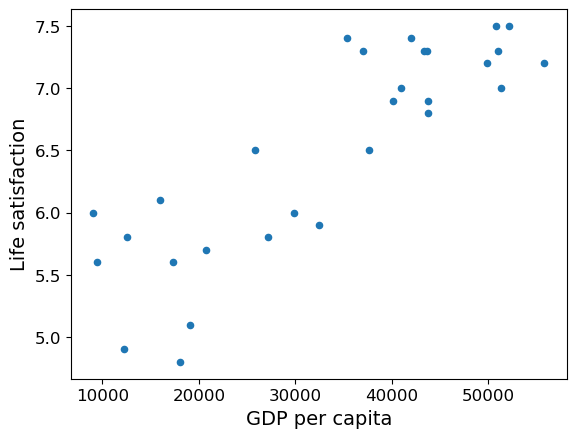

In [16]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

In [17]:
model = sklearn.linear_model.LinearRegression()

In [18]:
model.fit(X,y)

LinearRegression()

In [19]:
X_new=[[22587]]
print(model.predict(X_new))

[[5.96242338]]


In [22]:
import sklearn.neighbors
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [23]:
model2.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [24]:
model2.predict([[22587]])

array([[5.76666667]])